
# Modelling Intrusion Detection: Analysis of a Feature Selection Mechanism

## Method Description

### Step 1: Data preprocessing:

Data is Under Sampled inorder to avoid high Bias in the output features.

Nan values are treated in the dataset.

Features with Single values are dropped.

The features are scaled to avoid features with large values that may weigh too much in the results.

Target Columns are Label Encoded.

### Step 2: Feature Selection:


Eliminate redundant and irrelevant data by selecting a subset of relevant features that fully represents the given problem.

Univariate feature selection with Correlation and Chi-Square Test. This analyzes each feature individually to detemine the strength of the relationship between the feature and labels. 

Using SecondPercentile method (sklearn.feature_selection) to select features based on percentile of the highest scores. When this subset is found: Recursive Feature Elimination (RFE) is applied.

### Step 4: Build the model:

Logistic Regression,Decision tree and Random Forest model is built.

### Step 5: Prediction & Evaluation (validation):

Using the test data to make predictions of the model. 

Multiple scores are considered such as:accuracy score, recall, f-measure, confusion matrix. perform a 10-fold cross-validation.

### VERSION CHECK

In [2]:
import pandas as pd
import numpy as np
import sys
import sklearn
print('Pandas       ',pd.__version__)
print('Numpy        ',np.__version__)
print('System       ',sys.version)
print('Sklearn      ',sklearn.__version__)

Pandas        1.2.4
Numpy         1.20.1
System        3.8.8 (default, Apr 13 2021, 19:58:26) 
[GCC 7.3.0]
Sklearn       0.24.1


### CONFIGURATION

In [3]:
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### LOAD THE DATASET

In [4]:
df = pd.read_csv('Wednesday-workingHours.pcap_ISCX.csv')

In [5]:
raw_data = df.copy()

### SHAPE OF DATA

In [11]:
df.shape

(692703, 79)

### SAMPLE VIEW OF DATASET

In [6]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,6,6,6.000000,0.000000,3.132505e+02,52.208416,38308.000000,0.000000,38308,38308,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,20,20,26.104208,26.104208,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.000000,20,0,0,0,0,0,0,1,6,1,6,255,946,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,163,0,65.200000,89.278777,1.039666e+06,33402.922760,31.933333,25.510409,73,0,479,47.900000,38.942836,109,1,401,100.250000,101.736178,237,3,0,0,0,0,368,176,22964.509390,10438.413360,0,163,29.294118,56.529599,3195.595588,0,0,0,1,0,0,0,0,0,31.125000,15.636364,65.200000,368,0,0,0,0,0,0,11,172,5,326,29200,260,4,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,1575,0,525.000000,813.326503,5.753425e+06,14611.872150,73.000000,204.960972,810,1,1095,121.666667,298.746130,915,1,995,199.000000,345.535092,810,3,0,0,0,0,336,208,9132.420091,5479.452055,0,1575,370.588235,671.751541,451250.132400,0,0,0,1,0,0,0,0,0,393.750000,315.000000,525.000000,336,0,0,0,0,0,0,10,3150,6,3150,29200,2081,3,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,3069,0,555.000000,977.480342,6.650007e+05,1907.141918,543.071429,2519.931377,13391,0,15206,950.375000,3322.417812,13391,2,15112,1373.818182,4176.449588,13961,3,0,0,0,0,560,388,1117.979745,789.162173,0,3069,337.066667,704.654082,496537.374700,0,0,0,1,0,0,0,0,0,348.689655,203.058823,555.000000,560,0,0,0,0,0,0,17,3452,12,6660,29200,0,10,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,1576,0,525.333333,813.842901,5.771062e+06,13736.263740,78.000000,207.000929,794,1,1092,136.500000,313.850738,910,1,1015,203.000000,333.240154,794,3,0,0,0,0,304,208,8241.758242,5494.505495,0,1576,393.875000,704.585067,496440.116700,0,0,0,1,0,0,0,0,0,420.133333,350.000000,525.333333,304,0,0,0,0,0,0,9,3150,6,3152,29200,2081,2,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


### STATISTICAL SUMMARY ON DATASET

In [7]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,692703.000000,6.927030e+05,692703.000000,692703.000000,6.927030e+05,6.927030e+05,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,6.916950e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,692703.000000,692703.0,692703.0,692703.0,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,692703.000000,692703.000000,692703.000000,692703.000000,6.927030e+05,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,692703.0,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,6.927030e+05,692703.0,692703.0,692703.0,692703.0,692703.0,692703.0,692703.000000,6.927030e+05,692703.000000,6.927030e+05,692703.000000,692703.000000,692703.000000,692703.000000,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05
mean,5686.869462,2.800168e+07,9.556261,10.214079,5.550930e+02,1.699644e+04,233.593936,15.022183,60.555440,82.895863,1661.546313,33.832924,551.940841,658.636320,inf,inf,2.502809e+06,6.844318e+06,2.289307e+07,2.224592e+05,2.774476e+07,5.069287e+06,9.016685e+06,2.279837e+07,1.030778e+06,1.386407e+07,2.647068e+06,3.522882e+06,9.305284e+06,9.268549e+05,0.042201,0.0,0.0,0.0,2.420580e+02,2.492460e+02,9.545305e+04,4.052544e+03,13.723771,1725.129073,278.246605,523.265612,8.876018e+05,0.097301,0.042201,0.000338,0.193693,0.418049,0.066372,0.0,0.000339,0.556957,305.664882,60.555440,551.940841,2.420580e+02,0.0,0.0,0.0,0.0,0.0,0.0,9.556261,5.550930e+02,10.214079,1.699489e+04,5299.671256,1476.643078,6.121279,26.761141,9.224478e+04,4.760852e+04,1.627363e+05,6.315186e+04,2.211122e+07,4.743744e+05,2.252174e+07,2.173373e+07
std,15727.423560,4.276680e+07,747.197814,984.204633,6.163663e+03,2.241175e+06,603.751856,51.068835,157.643794,226.126084,2613.924428,64.586498,797.449564,1098.043102,NaN,NaN,5.595945e+06,1.175401e+07,3.839395e+07,3.673248e+06,4.277094e+07,1.103613e+07,1.600574e+07,3.843629e+07,8.866760e+06,3.335293e+07,9.593760e+06,1.073828e+07,2.616633e+07,8.107914e+06,0.201048,0.0,0.0,0.0,1.564277e+04,1.968957e+04,3.198607e+05,3.091927e+04,27.521716,2634.372188,369.130494,783.442461,1.748895e+06,0.296368,0.201048,0.018376,0.395192,0.493239,0.248931,0.0,0.018416,0.570734,398.045939,157.643794,797.449564,1.564277e+04,0.0,0.0,0.0,0.0,0.0,0.0,747.197814,6.163663e+03,984.204633,2.240953e+06,11869.737394,7315.272621,715.155068,6.322368,7.007049e+05,4.742081e+05,1.094616e+06,6.051023e+05,3.812415e+07,4.488512e+06,3.848292e+07,3.807725e+07
min,0.000000,-1.000000e+00,1.000000,

### OUTPUT LABELS & NUMBERS

In [8]:
df[' Label'].value_counts()

BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name:  Label, dtype: int64

### SPLITING INDEPENTDENT & DEPENDENT FEATURES

In [9]:
y = df[' Label']
X = df.drop(' Label',axis=1)

## STEP 1 : DATA PREPROCESSING 

### RANDOM UNDER SAMPLING

In [10]:
from imblearn.under_sampling import RandomUnderSampler

oversample = RandomUnderSampler(sampling_strategy='majority')

X, y = oversample.fit_resample(X, y)

In [12]:
X.shape

(252683, 78)

In [13]:
y.value_counts()

DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
BENIGN                  11
Name:  Label, dtype: int64

In [14]:
df = pd.concat([X,y],axis=1)

### NAN VALUE TREATEMENT

In [15]:
df.isnull().sum()

 Destination Port                 0
 Flow Duration                    0
 Total Fwd Packets                0
 Total Backward Packets           0
Total Length of Fwd Packets       0
 Total Length of Bwd Packets      0
 Fwd Packet Length Max            0
 Fwd Packet Length Min            0
 Fwd Packet Length Mean           0
 Fwd Packet Length Std            0
Bwd Packet Length Max             0
 Bwd Packet Length Min            0
 Bwd Packet Length Mean           0
 Bwd Packet Length Std            0
Flow Bytes/s                    949
 Flow Packets/s                   0
 Flow IAT Mean                    0
 Flow IAT Std                     0
 Flow IAT Max                     0
 Flow IAT Min                     0
Fwd IAT Total                     0
 Fwd IAT Mean                     0
 Fwd IAT Std                      0
 Fwd IAT Max                      0
 Fwd IAT Min                      0
Bwd IAT Total                     0
 Bwd IAT Mean                     0
 Bwd IAT Std                

We got 949 Nan Values in Flow Bytes.

Lets drop those 949 rows from our dataset

In [16]:
df.dropna(inplace=True)

### DROPPING UNIQUE COLUMNS

In [17]:
df.nunique()

 Destination Port                    9
 Flow Duration                  176650
 Total Fwd Packets                  33
 Total Backward Packets             25
Total Length of Fwd Packets       1675
 Total Length of Bwd Packets        40
 Fwd Packet Length Max             530
 Fwd Packet Length Min              20
 Fwd Packet Length Mean           4617
 Fwd Packet Length Std           10197
Bwd Packet Length Max               46
 Bwd Packet Length Min              10
 Bwd Packet Length Mean             76
 Bwd Packet Length Std             313
Flow Bytes/s                    174410
 Flow Packets/s                 182176
 Flow IAT Mean                  170010
 Flow IAT Std                    38345
 Flow IAT Max                    26173
 Flow IAT Min                     4574
Fwd IAT Total                    17529
 Fwd IAT Mean                    27679
 Fwd IAT Std                     23341
 Fwd IAT Max                     15557
 Fwd IAT Min                      6721
Bwd IAT Total            

We clearly see some columns with number of unique values as 1.

These columns as useless.

Lets drop those columns

In [18]:
for i in df.columns:
    if df[i].nunique() == 1:
        df.drop(i,axis=1,inplace=True)

###  SELECTING CATEGORICAL DATA

In [19]:
df.nunique()==2

 Destination Port               False
 Flow Duration                  False
 Total Fwd Packets              False
 Total Backward Packets         False
Total Length of Fwd Packets     False
 Total Length of Bwd Packets    False
 Fwd Packet Length Max          False
 Fwd Packet Length Min          False
 Fwd Packet Length Mean         False
 Fwd Packet Length Std          False
Bwd Packet Length Max           False
 Bwd Packet Length Min          False
 Bwd Packet Length Mean         False
 Bwd Packet Length Std          False
Flow Bytes/s                    False
 Flow Packets/s                 False
 Flow IAT Mean                  False
 Flow IAT Std                   False
 Flow IAT Max                   False
 Flow IAT Min                   False
Fwd IAT Total                   False
 Fwd IAT Mean                   False
 Fwd IAT Std                    False
 Fwd IAT Max                    False
 Fwd IAT Min                    False
Bwd IAT Total                   False
 Bwd IAT Mea

We clearly see some columns with number of unique values as 2.

These columns represents either True/False. 

Let's consider these columns as Categorical Features

In [20]:
df_categorical = df[['Fwd PSH Flags','FIN Flag Count',' SYN Flag Count',' PSH Flag Count',' ACK Flag Count',' URG Flag Count']]
df_numerical = df.drop(['Fwd PSH Flags','FIN Flag Count',' SYN Flag Count',' PSH Flag Count',' ACK Flag Count',' URG Flag Count'],axis=1)

In [21]:
df_numerical.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,41516,65,2,1,31,6,31,0,15.500000,21.920310,6,6,6.000000,0.000000,569230.769200,46153.846150,32.50000,2.333452e+01,49,16,49,49.000,0.000000,49,49,0,0.000000,0.000000e+00,0,0,64,20,30769.230770,15384.615380,0,31,17.000000,16.350331,267.333333,0,22.666667,15.500000,6.000000,64,2,31,1,6,1073,0,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,38492,6674,3,0,18,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,2697.033263,449.505544,3337.00000,4.714988e+03,6671,3,6674,3337.000,4714.988017,6671,3,0,0.000000,0.000000e+00,0,0,60,0,449.505544,0.000000,6,6,6.000000,0.000000,0.000000,0,8.000000,6.000000,0.000000,60,3,18,0,0,35,-1,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,443,5097888,6,7,998,394,517,0,166.333333,236.086990,206,2,56.285714,81.753113,273.054253,2.550076,424824.00000,1.302279e+06,4554426,3,543459,108691.800,126775.270100,310105,51,4981276,830212.666700,1.920342e+06,4748370,3,132,144,1.176958,1.373118,0,517,99.428571,168.376736,28350.725270,1,107.076923,166.333333,56.285714,132,6,998,7,394,8192,31088,5,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1267445,41,42,2728,6634,456,0,66.536585,110.129945,976,0,157.952381,319.079847,7386.513813,65.486076,15456.64634,1.059669e+05,956423,0,1267445,31686.125,158996.157500,996999,1,310962,7584.439024,1.773721e+04,88426,0,1328,1360,32.348544,33.137533,0,976,111.452381,241.615666,58378.130240,1,112.795181,66.536585,157.952381,1328,41,2728,42,6634,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,53,30125,1,1,52,80,52,52,52.000000,0.000000,80,80,80.000000,0.000000,4381.742739,66.390041,30125.00000,0.000000e+00,30125,30125,0,0.000,0.000000,0,0,0,0.000000,0.000000e+00,0,0,20,20,33.195021,33.195021,52,80,61.333333,16.165808,261.333333,1,92.000000,52.000000,80.000000,20,1,52,1,80,-1,-1,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [22]:
df_categorical.head()

,Fwd PSH Flags,FIN Flag Count,SYN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count
0,1,0,1,0,1,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [23]:
y = df_numerical[' Label']
df_numerical.drop(' Label',axis=1,inplace=True)

### FEATURE SCALING

#### Using StandardScaler() to scale the dataframes

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
stand = StandardScaler()
temp = stand.fit_transform(df_numerical)
df_numerical = pd.DataFrame(temp, columns=df_numerical.columns)

In [26]:
df_numerical.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,230.109354,-1.221908,-0.195117,-0.238548,-0.713527,-0.154983,-1.132918,-0.045779,-0.438423,-1.012569,-1.209767,0.920326,-1.293119,-1.172032,0.003396,-0.282087,-0.746530,-1.154961,-1.202760,-0.086481,-1.214155,-0.868707,-1.140693,-1.201204,-0.116733,-0.503966,-0.388646,-0.485677,-0.499227,-0.097524,-0.191917,-0.278761,-0.316940,0.945699,-0.036586,-1.207599,-1.279192,-1.237345,-0.990549,-0.661917,-1.262382,-0.438423,-1.293119,-0.191917,-0.195117,-0.713527,-0.238548,-0.154983,-0.274477,-0.160421,-0.818881,0.676578,-0.147361,-0.088364,-0.150026,-0.121203,-1.177993,-0.14917,-1.195753,-1.151595
1,213.315675,-1.221764,-0.138802,-0.314163,-0.747328,-0.155103,-1.272418,0.050167,-0.566308,-1.313748,-1.211655,-0.006107,-1.299464,-1.172032,-0.024682,-0.388396,-0.746073,-1.154621,-1.202614,-0.086483,-1.214011,-0.868441,-1.140452,-1.201058,-0.116738,-0.503966,-0.388646,-0.485677,-0.499227,-0.097524,-0.198950,-0.325933,-0.387612,-0.044011,0.469142,-1.215485,-1.304738,-1.254825,-0.990667,-0.661917,-1.293643,-0.566308,-1.299464,-0.198950,-0.138802,-0.747328,-0.314163,-0.155103,-0.384853,-0.161078,0.384169,-1.358183,-0.147361,-0.088364,-0.150026,-0.121203,-1.177993,-0.14917,-1.195753,-1.151595
2,2.011869,-1.110496,0.030142,0.215146,1.800707,-0.147190,1.578962,-0.045779,1.592040,1.930025,-1.146849,0.302704,-1.239949,-1.111599,-0.024802,-0.389435,-0.687775,-1.060402,-1.102478,-0.086483,-1.202310,-0.859930,-1.134202,-1.194382,-0.116733,-0.371055,-0.309748,-0.362984,-0.370971,-0.097524,-0.072356,0.013705,-0.388657,-0.043923,-0.036586,-1.054295,-1.087765,-1.074812,-0.978198,1.144397,-1.082467,1.592040,-1.239949,-0.072356,0.030142,1.800707,0.215146,-0.147190,0.482521,20.286601,2.188745,-1.358183,-0.147361,-0.088364,-0.150026,-0.121203,-1.177993,-0.14917,-1.195753,-1.151595
3,-0.326140,-1.194210,2.001163,2.861693,6.298768,-0.021859,1.238582,-0.045779,0.248613,0.199408,-0.904614,-0.006107,-1.132451,-0.936163,-0.024449,-0.389289,-0.744396,-1.147269,-1.181702,-0.086484,-1.186530,-0.866151,-1.132552,-1.179269,-0.116738,-0.495669,-0.387925,-0.484544,-0.496838,-0.097524,2.030512,2.881760,-0.388584,-0.041879,-0.036586,-0.909509,-1.059841,-0.996512,-0.964992,1.144397,-1.070278,0.248613,-1.132451,2.030512,2.001163,6.298768,2.861693,-0.021859,2.716403,-0.000596,13.617723,0.676578,-0.147361,-0.088364,-0.150026,-0.121203,-1.177993,-0.14917,-1.195753,-1.151595
4,-0.153983,-1.221251,-0.251432,-0.238548,-0.658927,-0.153496,-1.015738,0.785753,0.052927,-1.313748,-1.186488,12.346329,-1.214875,-1.172032,-0.024598,-0.389287,-0.742368,-1.154963,-1.202098,-0.081193,-1.214156,-0.868711,-1.140693,-1.201205,-0.116738,-0.503966,-0.388646,-0.485677,-0.499227,-0.097524,-0.269280,-0.278761,-0.388582,-0.041875,4.346385,-1.192142,-1.176235,-1.237542,-0.990552,1.144397,-1.114602,0.052927,-1.214875,-0.269280,-0.251432,-0.658927,-0.238548,-0.153496,-0.388681,-0.161078,-0.818881,-1.358183,-0.147361,-0.088364,-0.150026,-0.121203,-1.177993,-0.14917,-1.195753,-1.151595


In [27]:
df_categorical.head()

,Fwd PSH Flags,FIN Flag Count,SYN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count
0,1,0,1,0,1,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [28]:
print(df_numerical.shape)
print(df_categorical.shape)

(251734, 60)
(251734, 6)


In [29]:
df_numerical = df_numerical.reset_index()
df_categorical = df_categorical.reset_index()

In [30]:
df = pd.concat([df_numerical,df_categorical],axis=1)

In [31]:
df.head()

,index,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,index,Fwd PSH Flags,FIN Flag Count,SYN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count
0,0,230.109354,-1.221908,-0.195117,-0.238548,-0.713527,-0.154983,-1.132918,-0.045779,-0.438423,-1.012569,-1.209767,0.920326,-1.293119,-1.172032,0.003396,-0.282087,-0.746530,-1.154961,-1.202760,-0.086481,-1.214155,-0.868707,-1.140693,-1.201204,-0.116733,-0.503966,-0.388646,-0.485677,-0.499227,-0.097524,-0.191917,-0.278761,-0.316940,0.945699,-0.036586,-1.207599,-1.279192,-1.237345,-0.990549,-0.661917,-1.262382,-0.438423,-1.293119,-0.191917,-0.195117,-0.713527,-0.238548,-0.154983,-0.274477,-0.160421,-0.818881,0.676578,-0.147361,-0.088364,-0.150026,-0.121203,-1.177993,-0.14917,-1.195753,-1.151595,0,1,0,1,0,1,0
1,1,213.315675,-1.221764,-0.138802,-0.314163,-0.747328,-0.155103,-1.272418,0.050167,-0.566308,-1.313748,-1.211655,-0.006107,-1.299464,-1.172032,-0.024682,-0.388396,-0.746073,-1.154621,-1.202614,-0.086483,-1.214011,-0.868441,-1.140452,-1.201058,-0.116738,-0.503966,-0.388646,-0.485677,-0.499227,-0.097524,-0.198950,-0.325933,-0.387612,-0.044011,0.469142,-1.215485,-1.304738,-1.254825,-0.990667,-0.661917,-1.293643,-0.566308,-1.299464,-0.198950,-0.138802,-0.747328,-0.314163,-0.155103,-0.384853,-0.161078,0.384169,-1.358183,-0.147361,-0.088364,-0.150026,-0.121203,-1.177993,-0.14917,-1.195753,-1.151595,1,0,0,0,0,1,0
2,2,2.011869,-1.110496,0.030142,0.215146,1.800707,-0.147190,1.578962,-0.045779,1.592040,1.930025,-1.146849,0.302704,-1.239949,-1.111599,-0.024802,-0.389435,-0.687775,-1.060402,-1.102478,-0.086483,-1.202310,-0.859930,-1.134202,-1.194382,-0.116733,-0.371055,-0.309748,-0.362984,-0.370971,-0.097524,-0.072356,0.013705,-0.388657,-0.043923,-0.036586,-1.054295,-1.087765,-1.074812,-0.978198,1.144397,-1.082467,1.592040,-1.239949,-0.072356,0.030142,1.800707,0.215146,-0.147190,0.482521,20.286601,2.188745,-1.358183,-0.147361,-0.088364,-0.150026,-0.121203,-1.177993,-0.14917,-1.195753,-1.151595,2,0,0,0,1,0,0
3,3,-0.326140,-1.194210,2.001163,2.861693,6.298768,-0.021859,1.238582,-0.045779,0.248613,0.199408,-0.904614,-0.006107,-1.132451,-0.936163,-0.024449,-0.389289,-0.744396,-1.147269,-1.181702,-0.086484,-1.186530,-0.866151,-1.132552,-1.179269,-0.116738,-0.495669,-0.387925,-0.484544,-0.496838,-0.097524,2.030512,2.881760,-0.388584,-0.041879,-0.036586,-0.909509,-1.059841,-0.996512,-0.964992,1.144397,-1.070278,0.248613,-1.132451,2.030512,2.001163,6.298768,2.861693,-0.021859,2.716403,-0.000596,13.617723,0.676578,-0.147361,-0.088364,-0.150026,-0.121203,-1.177993,-0.14917,-1.195753,-1.151595,3,0,0,0,1,0,0
4,4,-0.153983,-1.221251,-0.251432,-0.238548,-0.658927,-0.153496,-1.015738,0.785753,0.052927,-1.313748,-1.186488,12.346329,-1.214875,-1.172032,-0.024598,-0.389287,-0.742368,-1.154963,-1.202098,-0.081193,-1.214156,-0.868711,-1.140693,-1.201205,-0.116738,-0.503966,-0.388646,-0.485677,-0.499227,-0.097524,-0.269280,-0.278761,-0.388582,-0.041875,4.346385,-1.192142,-1.176235,-1.237542,-0.990552,1.144397,-1.114602,0.052927,-1.214875,-0.269280,-0.251432,-0.658

In [32]:
df.drop('index',axis=1,inplace=True)

### LABEL ENCODING

Label Encoding Categorical Features in order to train model

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
label_encode = LabelEncoder()
y = label_encode.fit_transform(y)

## FEATURE ENGINEERING

### METHOD - 1 (MANUAL FEATURE SELECTION)

### NUMERICAL FEATURE SELECTION

### CORRELATION

Finding Correlation helps us to avoid multi-colinearity 

In [35]:
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] 
    return dataset

Selecting dataset with differenet correlation saturation value

In [36]:
corr_95 = correlation(df_numerical.copy(),0.95)
corr_90 = correlation(df_numerical.copy(),0.90)
corr_85 = correlation(df_numerical.copy(),0.85)
corr_80 = correlation(df_numerical.copy(),0.80)

In [37]:
corr_val = pd.DataFrame([['0.95',corr_95.shape[1]],['0.90',corr_90.shape[1]],['0.85',corr_85.shape[1]],['0.80',corr_80.shape[1]]],columns=['Threshold','No. of Columns'])
corr_val

,Threshold,No. of Columns
0,0.95,36
1,0.90,30
2,0.85,28
3,0.80,26


### CATEGORICAL FEATURE SELECTION

In [38]:
df_categorical.head()

,index,Fwd PSH Flags,FIN Flag Count,SYN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count
0,0,1,0,1,0,1,0
1,1,0,0,0,0,1,0
2,2,0,0,0,1,0,0
3,3,0,0,0,1,0,0
4,4,0,0,0,0,0,0


In [39]:
df_categorical = df_categorical.replace({0:False,1:True})

In [40]:
df_categorical.drop('index',axis=1,inplace=True)

### CHI-SQUARE TEST

Chi Square Statistics is used to find the relationship between Categorical features

In [41]:
import math
import scipy.stats as stats

def cramers_vcorrected_stat(confusion_matrix):

    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    number_of_rows = confusion_matrix.sum()
    phi2 = chi2 / number_of_rows
    row, key = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((key - 1) * (row - 1)) / (number_of_rows - 1))
    r_corr = row - ((row - 1) ** 2) / (number_of_rows - 1)
    k_corr = key - ((key - 1) ** 2) / (number_of_rows - 1)
    return math.sqrt(phi2_corr / min((r_corr - 1), (k_corr - 1)))

In [42]:
relation = pd.DataFrame(columns=['feature1','feature2','cramer value'])

for i in df_categorical.columns: 
    for j in df_categorical.columns:         
        
        mycrosstab = pd.crosstab(df_categorical[i],df_categorical[j])
        mycrosstab = mycrosstab.values
        
        cramer_value = cramers_vcorrected_stat(mycrosstab)
        
        if(cramer_value>0.5 and cramer_value<=0.99):
            relation.loc[len(relation.index)] = [i,j, cramer_value]

In [43]:
relation

,feature1,feature2,cramer value
0,FIN Flag Count,ACK Flag Count,0.74922
1,ACK Flag Count,FIN Flag Count,0.74922


We find that FIN Flag Count	and ACK Flag Count have high cramer value. 

So, we can either one of the columns to avoid multi-collinearity

In [44]:
df_categorical.drop('FIN Flag Count',axis=1,inplace=True)

In [45]:
df_categorical.head()

,Fwd PSH Flags,SYN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count
0,True,True,False,True,False
1,False,False,False,True,False
2,False,False,True,False,False
3,False,False,True,False,False
4,False,False,False,False,False


### CONCATING DATAFRAMES

In [46]:
df1 = pd.concat([corr_95,df_categorical],axis=1)
df2 = pd.concat([corr_90,df_categorical],axis=1)
df3 = pd.concat([corr_85,df_categorical],axis=1)
df4 = pd.concat([corr_80,df_categorical],axis=1)

In [47]:
df1.drop('index',axis=1,inplace=True)
df2.drop('index',axis=1,inplace=True)
df3.drop('index',axis=1,inplace=True)
df4.drop('index',axis=1,inplace=True)

Final shape of Different dataset in our manual feature Selection

In [48]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

print(y.shape)

(251734, 40)
(251734, 34)
(251734, 32)
(251734, 30)
(251734,)


### CROSS VALIDATION

In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [50]:
def model(model,x,y,score='accuracy'):
    error = cross_val_score(model,x,y,cv=k_fold,n_jobs=-1,scoring=score)
    return error

In [57]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### LOGISTIC REGRESSION

In [54]:
df1_error = model(LogisticRegression(),df1,y)
df1_error

array([0.99833161, 0.99813299, 0.9986494 , 0.99868912, 0.99845072,
       0.99868907, 0.9987288 , 0.99868907, 0.9985699 , 0.99860962])

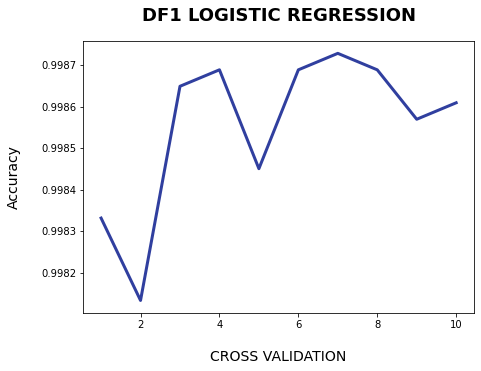

In [158]:
plt.figure(figsize=(7, 5))
plt.title('DF1 LOGISTIC REGRESSION', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('CROSS VALIDATION', fontsize=14, labelpad=20)
plt.ylabel('Accuracy', fontsize=14, labelpad=20)
plt.plot(range(1, len(df1_error) + 1), df1_error, color='#303F9F', linewidth=3)

plt.show()

In [59]:
df1_mean_accuracy = np.mean(df1_error)
df1_mean_accuracy

0.9985540308936945

In [60]:
df2_error = model(LogisticRegression(),df2,y)
df2_error

array([0.99813299, 0.99765631, 0.99821244, 0.99829189, 0.99805347,
       0.99829182, 0.99837127, 0.99860962, 0.99817265, 0.99845072])

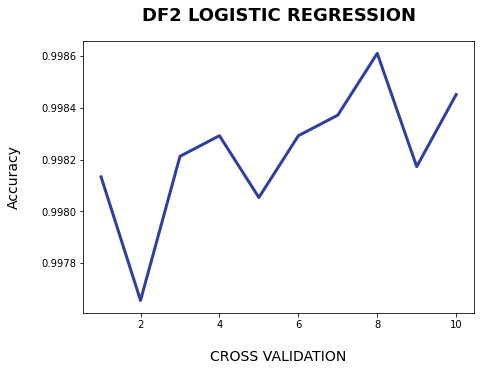

In [61]:
plt.figure(figsize=(7, 5))
plt.title('DF2 LOGISTIC REGRESSION', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('CROSS VALIDATION', fontsize=14, labelpad=20)
plt.ylabel('Accuracy', fontsize=14, labelpad=20)
plt.plot(range(1, len(df2_error) + 1), df2_error, color='#303F9F', linewidth=3)

plt.show()

In [62]:
df2_mean_accuracy = np.mean(df2_error)
df2_mean_accuracy

0.99822431854115

In [63]:
df3_error = model(LogisticRegression(),df3,y)
df3_error

array([0.99813299, 0.99769604, 0.99821244, 0.99813299, 0.99801374,
       0.9982521 , 0.99813292, 0.99876852, 0.99821237, 0.99833155])

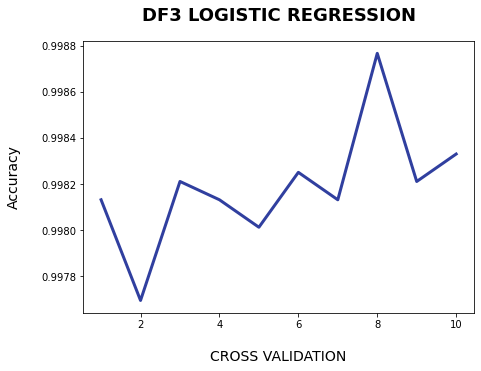

In [64]:
plt.figure(figsize=(7, 5))
plt.title('DF3 LOGISTIC REGRESSION', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('CROSS VALIDATION', fontsize=14, labelpad=20)
plt.ylabel('Accuracy', fontsize=14, labelpad=20)
plt.plot(range(1, len(df3_error) + 1), df3_error, color='#303F9F', linewidth=3)

plt.show()

In [65]:
df3_mean_accuracy = np.mean(df3_error)
df3_mean_accuracy

0.9981885664224934

In [66]:
df4_error = model(LogisticRegression(),df4,y)
df4_error

array([0.99813299, 0.99737825, 0.99801382, 0.99777548, 0.99769594,
       0.99781512, 0.99761649, 0.99805347, 0.99781512, 0.99805347])

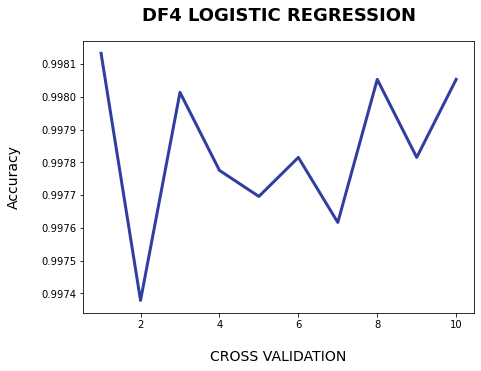

In [67]:
plt.figure(figsize=(7, 5))
plt.title('DF4 LOGISTIC REGRESSION', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('CROSS VALIDATION', fontsize=14, labelpad=20)
plt.ylabel('Accuracy', fontsize=14, labelpad=20)
plt.plot(range(1, len(df4_error) + 1), df4_error, color='#303F9F', linewidth=3)

plt.show()

In [68]:
df4_mean_accuracy = np.mean(df4_error)
df4_mean_accuracy

0.9978350164837397

### DECISION TREE

In [69]:
df1_dt_error = model(DecisionTreeClassifier(),df1,y)
df1_dt_error

array([0.99936442, 0.99920553, 0.99944387, 0.99944387, 0.99924522,
       0.9993644 , 0.99948357, 0.99948357, 0.99932467, 0.99964247])

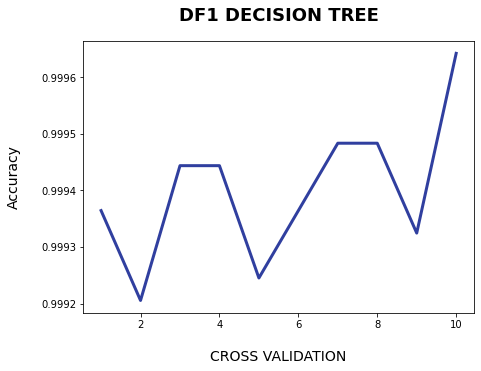

In [70]:
plt.figure(figsize=(7, 5))
plt.title('DF1 DECISION TREE', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('CROSS VALIDATION', fontsize=14, labelpad=20)
plt.ylabel('Accuracy', fontsize=14, labelpad=20)
plt.plot(range(1, len(df1_dt_error) + 1), df1_dt_error, color='#303F9F', linewidth=3)

plt.show()

In [71]:
df1_dt_mean_accuracy = np.mean(df1_dt_error)
df1_dt_mean_accuracy

0.9994001610547235

In [72]:
df2_dt_error = model(DecisionTreeClassifier(),df2,y)
df2_dt_error

array([0.99928498, 0.99928498, 0.99944387, 0.99956304, 0.99928495,
       0.99940412, 0.99948357, 0.9993644 , 0.99960275, 0.99956302])

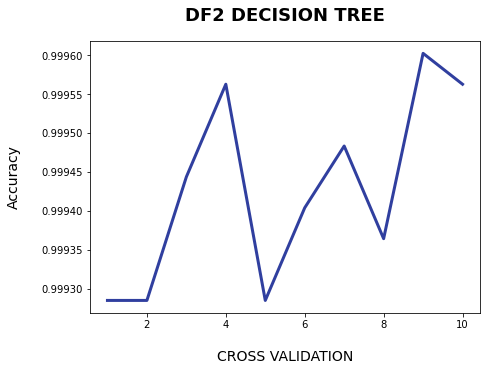

In [73]:
plt.figure(figsize=(7, 5))
plt.title('DF2 DECISION TREE', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('CROSS VALIDATION', fontsize=14, labelpad=20)
plt.ylabel('Accuracy', fontsize=14, labelpad=20)
plt.plot(range(1, len(df2_dt_error) + 1), df2_dt_error, color='#303F9F', linewidth=3)

plt.show()

In [74]:
df2_dt_mean_accuracy = np.mean(df2_dt_error)
df2_dt_mean_accuracy

0.9994279681529218

In [75]:
df3_dt_error = model(DecisionTreeClassifier(),df3,y)
df3_dt_error

array([0.99940415, 0.99928498, 0.99948359, 0.99948359, 0.99932467,
       0.99948357, 0.9995233 , 0.9993644 , 0.99956302, 0.99964247])

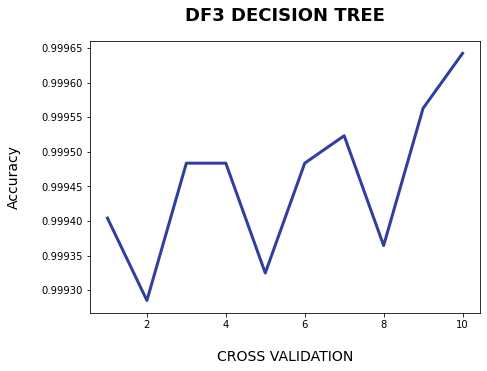

In [76]:
plt.figure(figsize=(7, 5))
plt.title('DF3 DECISION TREE', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('CROSS VALIDATION', fontsize=14, labelpad=20)
plt.ylabel('Accuracy', fontsize=14, labelpad=20)
plt.plot(range(1, len(df3_dt_error) + 1), df3_dt_error, color='#303F9F', linewidth=3)

plt.show()

In [77]:
df3_dt_mean_accuracy = np.mean(df3_dt_error)
df3_dt_mean_accuracy

0.9994557754089219

In [78]:
df4_dt_error = model(DecisionTreeClassifier(),df4,y)
df4_dt_error

array([0.99936442, 0.9993247 , 0.99952332, 0.99952332, 0.99932467,
       0.99944385, 0.9995233 , 0.9993644 , 0.99964247, 0.9995233 ])

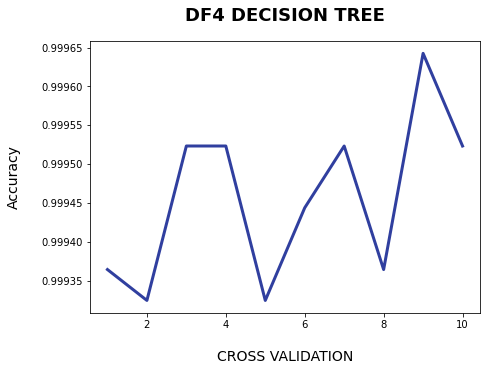

In [79]:
plt.figure(figsize=(7, 5))
plt.title('DF4 DECISION TREE', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('CROSS VALIDATION', fontsize=14, labelpad=20)
plt.ylabel('Accuracy', fontsize=14, labelpad=20)
plt.plot(range(1, len(df4_dt_error) + 1), df4_dt_error, color='#303F9F', linewidth=3)

plt.show()

In [80]:
df4_dt_mean_accuracy = np.mean(df4_dt_error)
df4_dt_mean_accuracy

0.9994557750933177

### RANDOM FOREST

In [81]:
df1_rf_error = model(RandomForestClassifier(),df1,y)
df1_rf_error

array([0.99940415, 0.99944387, 0.99956304, 0.99964249, 0.9993644 ,
       0.9995233 , 0.99964247, 0.99944385, 0.99964247, 0.99964247])

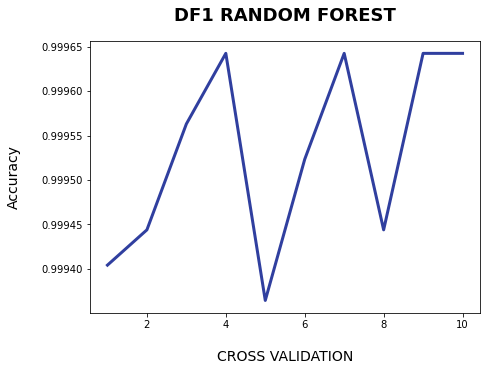

In [82]:
plt.figure(figsize=(7, 5))
plt.title('DF1 RANDOM FOREST', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('CROSS VALIDATION', fontsize=14, labelpad=20)
plt.ylabel('Accuracy', fontsize=14, labelpad=20)
plt.plot(range(1, len(df1_rf_error) + 1), df1_rf_error, color='#303F9F', linewidth=3)

plt.show()

In [83]:
df1_rf_mean_accuracy = np.mean(df1_rf_error)
df1_rf_mean_accuracy

0.9995312515252559

In [84]:
df2_rf_error = model(RandomForestClassifier(),df2,y)
df2_rf_error

array([0.99944387, 0.99948359, 0.99964249, 0.99952332, 0.99940412,
       0.9995233 , 0.99964247, 0.99940412, 0.99964247, 0.99972192])

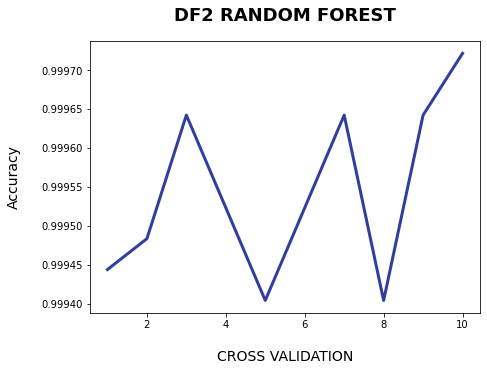

In [85]:
plt.figure(figsize=(7, 5))
plt.title('DF2 RANDOM FOREST', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('CROSS VALIDATION', fontsize=14, labelpad=20)
plt.ylabel('Accuracy', fontsize=14, labelpad=20)
plt.plot(range(1, len(df2_rf_error) + 1), df2_rf_error, color='#303F9F', linewidth=3)

plt.show()

In [86]:
df2_rf_mean_accuracy = np.mean(df2_rf_error)
df2_rf_mean_accuracy

0.9995431688981415

In [87]:
df3_rf_error = model(RandomForestClassifier(),df3,y)
df3_rf_error

array([0.99936442, 0.99944387, 0.99960276, 0.99948359, 0.9993644 ,
       0.9995233 , 0.99960275, 0.9993644 , 0.9996822 , 0.99964247])

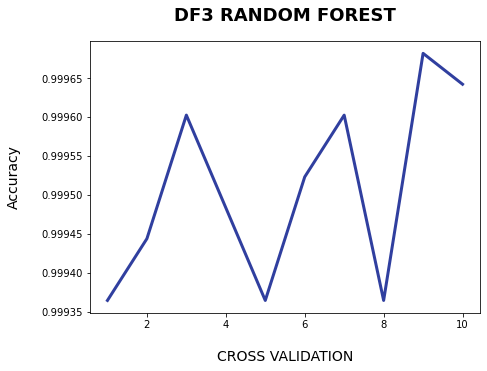

In [88]:
plt.figure(figsize=(7, 5))
plt.title('DF3 RANDOM FOREST', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('CROSS VALIDATION', fontsize=14, labelpad=20)
plt.ylabel('Accuracy', fontsize=14, labelpad=20)
plt.plot(range(1, len(df3_rf_error) + 1), df3_rf_error, color='#303F9F', linewidth=3)

plt.show()

In [89]:
df3_rf_mean_accuracy = np.mean(df3_rf_error)
df3_rf_mean_accuracy

0.9995074170950892

In [90]:
df4_rf_error = model(RandomForestClassifier(),df4,y)
df4_rf_error

array([0.99940415, 0.99948359, 0.99960276, 0.99956304, 0.99940412,
       0.99956302, 0.9996822 , 0.9993644 , 0.9996822 , 0.99956302])

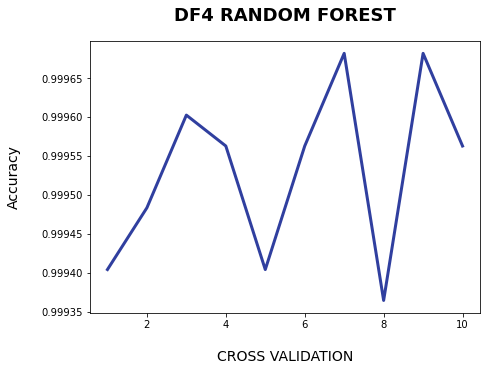

In [91]:
plt.figure(figsize=(7, 5))
plt.title('DF4 RANDOM FOREST', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('CROSS VALIDATION', fontsize=14, labelpad=20)
plt.ylabel('Accuracy', fontsize=14, labelpad=20)
plt.plot(range(1, len(df4_rf_error) + 1), df4_rf_error, color='#303F9F', linewidth=3)

plt.show()

In [92]:
df4_rf_mean_accuracy = np.mean(df4_rf_error)
df4_rf_mean_accuracy

0.9995312515252559

In [93]:
manual_analysis_output = pd.DataFrame([['DF1 (0.95 CORR)',df1_mean_accuracy,df1_dt_mean_accuracy,df1_rf_mean_accuracy],
              ['DF2 (0.90 CORR)',df2_mean_accuracy,df2_dt_mean_accuracy,df2_rf_mean_accuracy],
              ['DF3 (0.85 CORR)',df3_mean_accuracy,df3_dt_mean_accuracy,df3_rf_mean_accuracy],
              ['DF4 (0.80 CORR)',df1_mean_accuracy,df4_dt_mean_accuracy,df4_rf_mean_accuracy]],columns=['DATFRAME','LOGISTIC REGRESSION','DECISION TREE','RANDOM FOREST'])

In [94]:
manual_analysis_output

,DATFRAME,LOGISTIC REGRESSION,DECISION TREE,RANDOM FOREST
0,DF1 (0.95 CORR),0.998554,0.999400,0.999531
1,DF2 (0.90 CORR),0.998224,0.999428,0.999543
2,DF3 (0.85 CORR),0.998189,0.999456,0.999507
3,DF4 (0.80 CORR),0.998554,0.999456,0.999531


In [ ]:
from pandas.table.plotting import table # EDIT: see deprecation warnings below

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df)  # where df is your data frame

### TRAIN TEST SPLIT

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,accuracy_score

In [96]:
X_train, X_test, y_train, y_test = train_test_split(df3, y, test_size=0.20, random_state=101)

### FINAL RANDOM FOREST MODEL

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train,y_train)
random_forest_prediction = random_forest_model.predict(X_test)

In [99]:
print("RANDOM FOREST \n")
print('*************************CONFUSION MATRIX*******************\n')
print(confusion_matrix(y_test,random_forest_prediction),"\n")
print('\n\n***********************CLASSIFICATION REPORT****************\n')
print(classification_report(y_test,random_forest_prediction))
print('\n\n**************************ACCURACY SCORE********************\n')
print(accuracy_score(y_test,random_forest_prediction))

RANDOM FOREST 

*************************CONFUSION MATRIX*******************

[[    1     0     1     0     0     0]
 [    0  1991     7     1     0     0]
 [    0     4 46107     0     0     0]
 [    0     1     0  1099     5     0]
 [    0     0     0     1  1128     0]
 [    0     0     0     0     0     1]] 



***********************CLASSIFICATION REPORT****************

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00      1999
           2       1.00      1.00      1.00     46111
           3       1.00      0.99      1.00      1105
           4       1.00      1.00      1.00      1129
           5       1.00      1.00      1.00         1

    accuracy                           1.00     50347
   macro avg       1.00      0.91      0.94     50347
weighted avg       1.00      1.00      1.00     50347



**************************ACCURACY SCORE********************

0.999602756867

# METHOD - 2 (RECURRENT FEATURE SELECTION WITH CROSS VALIDATION)

### FEATURE SELECTION USING RFECV

In [111]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
import time

from sklearn.tree import DecisionTreeRegressor

In [122]:
start = time.time()
rfc = DecisionTreeRegressor(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10))
rfecv.fit(df, y)
end = time.time()

In [123]:
print('Time Taken {} mins'.format(round((end-start)/60,2)))

Time Taken 36.69 mins


In [124]:
print(rfecv.n_features_)

31


In [125]:
df.columns[np.where(rfecv.support_ == True)[0]]

Index([' Destination Port', ' Flow Duration', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', ' Flow Packets/s', ' Flow IAT Mean',
       ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean',
       ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Fwd Header Length', ' Bwd Packets/s',
       ' Packet Length Mean', ' Packet Length Std', ' Fwd Header Length.1',
       ' Subflow Bwd Packets', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' min_seg_size_forward', ' Active Max',
       'Fwd PSH Flags', 'FIN Flag Count', ' URG Flag Count'],
      dtype='object')

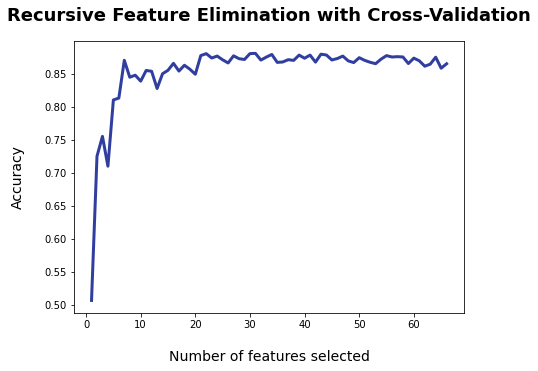

In [126]:
plt.figure(figsize=(7, 5))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('Accuracy', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [127]:
temp1 = rfecv.estimator_.feature_importances_

In [128]:
temp2 = df.columns[np.where(rfecv.support_ == True)[0]]

In [129]:
feature_importance = pd.DataFrame([temp2, temp1]).transpose()
feature_importance = feature_importance.rename({'0':'Columns','1':'Feature Importance'})

In [130]:
feature_importance

,0,1
0,Destination Port,0.000771
1,Flow Duration,0.001147
2,Total Length of Bwd Packets,0.126414
3,Fwd Packet Length Max,0.046527
4,Fwd Packet Length Mean,0.001216
5,Fwd Packet Length Std,0.000341
6,Flow Packets/s,0.00007
7,Flow IAT Mean,0.006807
8,Flow IAT Max,0.000151
9,Flow IAT Min,0.000609


In [132]:
df.drop(df.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

In [133]:
df.head()

,Destination Port,Flow Duration,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Mean,Fwd Packet Length Std,Flow Packets/s,Flow IAT Mean,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Mean,Bwd IAT Std,Fwd Header Length,Bwd Packets/s,Packet Length Mean,Packet Length Std,Fwd Header Length.1,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active Max,Fwd PSH Flags,FIN Flag Count,URG Flag Count
0,230.109354,-1.221908,-0.154983,-1.132918,-0.438423,-1.012569,-0.282087,-0.746530,-1.202760,-0.086481,-1.214155,-0.868707,-1.140693,-1.201204,-0.116733,-0.388646,-0.485677,-0.191917,0.945699,-1.279192,-1.237345,-0.191917,-0.238548,-0.154983,-0.274477,-0.160421,0.676578,-0.150026,1,0,0
1,213.315675,-1.221764,-0.155103,-1.272418,-0.566308,-1.313748,-0.388396,-0.746073,-1.202614,-0.086483,-1.214011,-0.868441,-1.140452,-1.201058,-0.116738,-0.388646,-0.485677,-0.198950,-0.044011,-1.304738,-1.254825,-0.198950,-0.314163,-0.155103,-0.384853,-0.161078,-1.358183,-0.150026,0,0,0
2,2.011869,-1.110496,-0.147190,1.578962,1.592040,1.930025,-0.389435,-0.687775,-1.102478,-0.086483,-1.202310,-0.859930,-1.134202,-1.194382,-0.116733,-0.309748,-0.362984,-0.072356,-0.043923,-1.087765,-1.074812,-0.072356,0.215146,-0.147190,0.482521,20.286601,-1.358183,-0.150026,0,0,0
3,-0.326140,-1.194210,-0.021859,1.238582,0.248613,0.199408,-0.389289,-0.744396,-1.181702,-0.086484,-1.186530,-0.866151,-1.132552,-1.179269,-0.116738,-0.387925,-0.484544,2.030512,-0.041879,-1.059841,-0.996512,2.030512,2.861693,-0.021859,2.716403,-0.000596,0.676578,-0.150026,0,0,0
4,-0.153983,-1.221251,-0.153496,-1.015738,0.052927,-1.313748,-0.389287,-0.742368,-1.202098,-0.081193,-1.214156,-0.868711,-1.140693,-1.201205,-0.116738,-0.388646,-0.485677,-0.269280,-0.041875,-1.176235,-1.237542,-0.269280,-0.238548,-0.153496,-0.388681,-0.161078,-1.358183,-0.150026,0,0,0


### TRAIN TEST SPLIT

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,accuracy_score

In [135]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20, random_state=101)

### CROSS VALIDATION

In [136]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [137]:
def model(model,x,y,score='accuracy'):
    error = cross_val_score(model,x,y,cv=k_fold,n_jobs=-1,scoring=score)
    return error

### LOGISTIC REGRESSION

In [138]:
lr_error = model(LogisticRegression(),df,y)
lr_error

array([0.99618654, 0.99610709, 0.99634544, 0.99706046, 0.99547134,
       0.99638502, 0.99638502, 0.99662337, 0.99682199, 0.99574941])

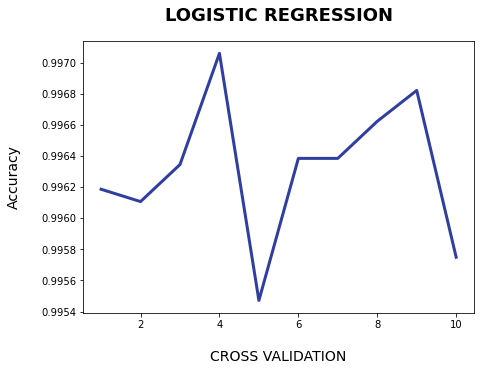

In [139]:
plt.figure(figsize=(7, 5))
plt.title('LOGISTIC REGRESSION', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('CROSS VALIDATION', fontsize=14, labelpad=20)
plt.ylabel('Accuracy', fontsize=14, labelpad=20)
plt.plot(range(1, len(lr_error) + 1), lr_error, color='#303F9F', linewidth=3)

plt.show()

### DECISION TREE

In [140]:
dt_error = model(DecisionTreeClassifier(),df,y)
dt_error

array([0.99936442, 0.99916581, 0.99944387, 0.99952332, 0.99924522,
       0.99944385, 0.99956302, 0.99944385, 0.9995233 , 0.99972192])

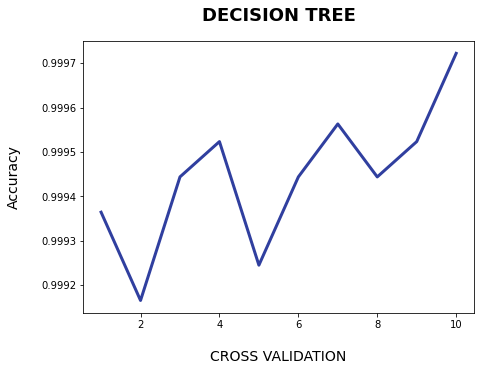

In [141]:
plt.figure(figsize=(7, 5))
plt.title('DECISION TREE', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('CROSS VALIDATION', fontsize=14, labelpad=20)
plt.ylabel('Accuracy', fontsize=14, labelpad=20)
plt.plot(range(1, len(dt_error) + 1), dt_error, color='#303F9F', linewidth=3)

plt.show()

### RANDOM FOREST

In [142]:
rf_error = model(RandomForestClassifier(),df,y)
rf_error

array([0.99944387, 0.99948359, 0.99964249, 0.99960276, 0.9993644 ,
       0.99956302, 0.99960275, 0.9995233 , 0.9996822 , 0.99964247])

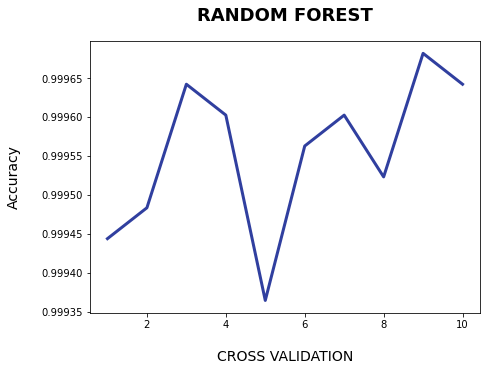

In [143]:
plt.figure(figsize=(7, 5))
plt.title('RANDOM FOREST', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('CROSS VALIDATION', fontsize=14, labelpad=20)
plt.ylabel('Accuracy', fontsize=14, labelpad=20)
plt.plot(range(1, len(rf_error) + 1), rf_error, color='#303F9F', linewidth=3)

plt.show()

## MODEL BUILDING

### LOGISTIC REGRESSION

In [144]:
from sklearn.linear_model import LogisticRegression

In [145]:
logisric_regression_model = LogisticRegression()
logisric_regression_model.fit(X_train,y_train)
logistic_regression_prediction = logisric_regression_model.predict(X_test)

In [146]:
print("LOGISTIC REGRESSION \n")
print('*************************CONFUSION MATRIX*******************\n')
print(confusion_matrix(y_test,logistic_regression_prediction))
print('\n\n***********************CLASSIFICATION REPORT****************\n')
print(classification_report(y_test,logistic_regression_prediction))
print('\n\n**************************ACCURACY SCORE********************\n')
print(accuracy_score(y_test,logistic_regression_prediction))

LOGISTIC REGRESSION 

*************************CONFUSION MATRIX*******************

[[    0     0     1     0     1     0]
 [    0  1958    17     1    23     0]
 [    0     3 46074     1    33     0]
 [    0     2     0  1026    77     0]
 [    0     1     2    19  1107     0]
 [    0     0     0     0     0     1]]


***********************CLASSIFICATION REPORT****************

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.98      0.99      1999
           2       1.00      1.00      1.00     46111
           3       0.98      0.93      0.95      1105
           4       0.89      0.98      0.93      1129
           5       1.00      1.00      1.00         1

    accuracy                           1.00     50347
   macro avg       0.81      0.81      0.81     50347
weighted avg       1.00      1.00      1.00     50347



**************************ACCURACY SCORE********************

0.99640494

### DECISION TREE

In [147]:
from sklearn.tree import DecisionTreeClassifier

In [148]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train,y_train)
decision_tree_prediction = decision_tree_model.predict(X_test)

In [149]:
print("DECISION TREE \n")
print('*************************CONFUSION MATRIX*******************\n')
print(confusion_matrix(y_test,decision_tree_prediction),"\n")
print('\n\n***********************CLASSIFICATION REPORT****************\n')
print(classification_report(y_test,decision_tree_prediction))
print('\n\n**************************ACCURACY SCORE********************\n')
print(accuracy_score(y_test,decision_tree_prediction))

DECISION TREE 

*************************CONFUSION MATRIX*******************

[[    1     0     0     1     0     0]
 [    0  1992     6     1     0     0]
 [    0     5 46106     0     0     0]
 [    0     2     0  1095     8     0]
 [    0     0     0     5  1124     0]
 [    0     1     0     0     0     0]] 



***********************CLASSIFICATION REPORT****************

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00      1999
           2       1.00      1.00      1.00     46111
           3       0.99      0.99      0.99      1105
           4       0.99      1.00      0.99      1129
           5       0.00      0.00      0.00         1

    accuracy                           1.00     50347
   macro avg       0.83      0.75      0.77     50347
weighted avg       1.00      1.00      1.00     50347



**************************ACCURACY SCORE********************

0.999423997457

### RANDOM FOREST

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
random_forest_model = RandomForestClassifier(max_depth=3)
random_forest_model.fit(X_train,y_train)
random_forest_prediction = random_forest_model.predict(X_test)

In [152]:
print("RANDOM FOREST \n")
print('*************************CONFUSION MATRIX*******************\n')
print(confusion_matrix(y_test,random_forest_prediction),"\n")
print('\n\n***********************CLASSIFICATION REPORT****************\n')
print(classification_report(y_test,random_forest_prediction))
print('\n\n**************************ACCURACY SCORE********************\n')
print(accuracy_score(y_test,random_forest_prediction))

RANDOM FOREST 

*************************CONFUSION MATRIX*******************

[[    0     0     2     0     0     0]
 [    0  1577   421     1     0     0]
 [    0     0 46111     0     0     0]
 [    0     1   290   797    17     0]
 [    0     0   224     2   903     0]
 [    0     1     0     0     0     0]] 



***********************CLASSIFICATION REPORT****************

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.79      0.88      1999
           2       0.98      1.00      0.99     46111
           3       1.00      0.72      0.84      1105
           4       0.98      0.80      0.88      1129
           5       0.00      0.00      0.00         1

    accuracy                           0.98     50347
   macro avg       0.66      0.55      0.60     50347
weighted avg       0.98      0.98      0.98     50347



**************************ACCURACY SCORE********************

0.980952191788

### OUTPUT

In [153]:
final_score = pd.DataFrame([['Logistic Regression',accuracy_score(y_test,logistic_regression_prediction)],['Decision Tree',accuracy_score(y_test,decision_tree_prediction)],['Random Forest',accuracy_score(y_test,random_forest_prediction)]],columns=['Model','Accuracy'])

In [154]:
final_score

,Model,Accuracy
0,Logistic Regression,0.996405
1,Decision Tree,0.999424
2,Random Forest,0.980952


We found that decision tree outperformed all other models with the highest accuracy rate of 0.999424.

### CONCLUSION

In this Notebook , the significance of using a set of relevant features with an adequate classification learning algorithm for modelling an IDS has been demonstrated. A presentation and proposition of a feature selection method which consist of a univariate features selection and a recursive feature elimination using a different classifier to identify important features have been done. This process repeatedly builds a model placing the feature aside and then repeating the process with the remaining features until all features present in the dataset are exhausted. The evaluation the effectiveness of the method using different classification metric measurement has been made and it has been proved that by reducing the number of feature, the accuracy of the model was improved. The feature selection method proposed in this paper had achieved a high result in term of accuracy and features were identified based on information gain and ranking technique.
